# ***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

## Reading Data

In [2]:
data=pd.read_csv('StudentPerformanceFactors.csv')
df=data.copy()#make a copy from data to save the origin one

## **EDA**

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

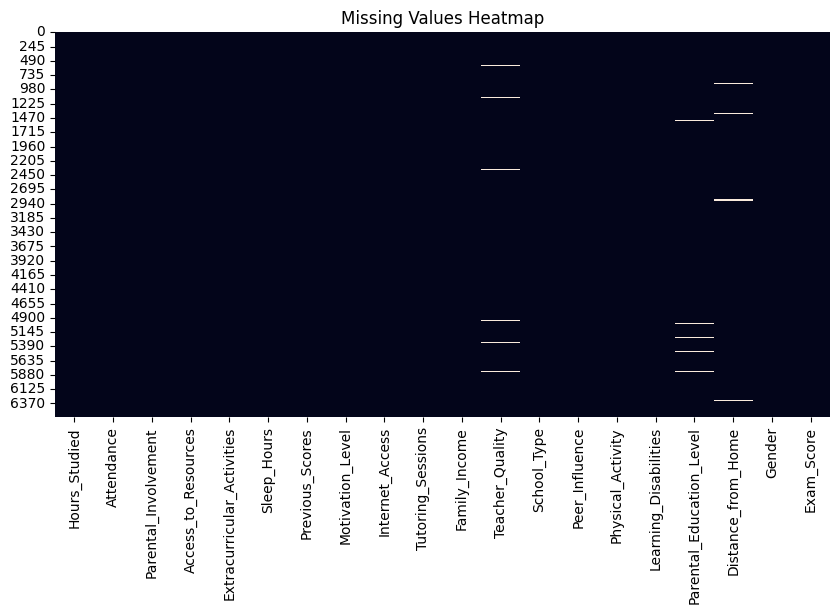

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False,cmap='rocket')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
Parental_Involvement,6378,3,Medium,3251
Access_to_Resources,6378,3,Medium,3204
Extracurricular_Activities,6378,2,Yes,3807
Motivation_Level,6378,3,Medium,3237
Internet_Access,6378,2,Yes,5893
Family_Income,6378,3,Low,2582
Teacher_Quality,6378,3,Medium,3826
School_Type,6378,2,Public,4434
Peer_Influence,6378,3,Positive,2553
Learning_Disabilities,6378,2,No,5710


In [11]:
cat=df.select_dtypes(include='object').columns
num=df.select_dtypes(exclude='object').columns

In [12]:
cat

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [13]:
df['Tutoring_Sessions'].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_distribution(column_name, df, colors=('#4B8BBE', '#FFB000', '#94C973')):
   
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    data = df[column_name].dropna()

    if not pd.api.types.is_numeric_dtype(data):
        raise TypeError(f"Column '{column_name}' is not numeric.")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Distribution of "{column_name}"', fontsize=20, fontweight='bold', color='navy')

    # Histogram
    sns.histplot(data, bins=30, color=colors[0], ax=axes[0], edgecolor='black')
    axes[0].set_title('Histogram', fontsize=14, color='darkblue')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(data, fill=True, color=colors[1], ax=axes[1])
    axes[1].set_title('Density Plot (KDE)', fontsize=14, color='darkorange')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Density')

    # Box Plot
    sns.boxplot(y=data, ax=axes[2], color=colors[2])
    axes[2].set_title('Box Plot', fontsize=14, color='darkgreen')
    axes[2].set_ylabel(column_name)

    # Grid
    for ax in axes:
        ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


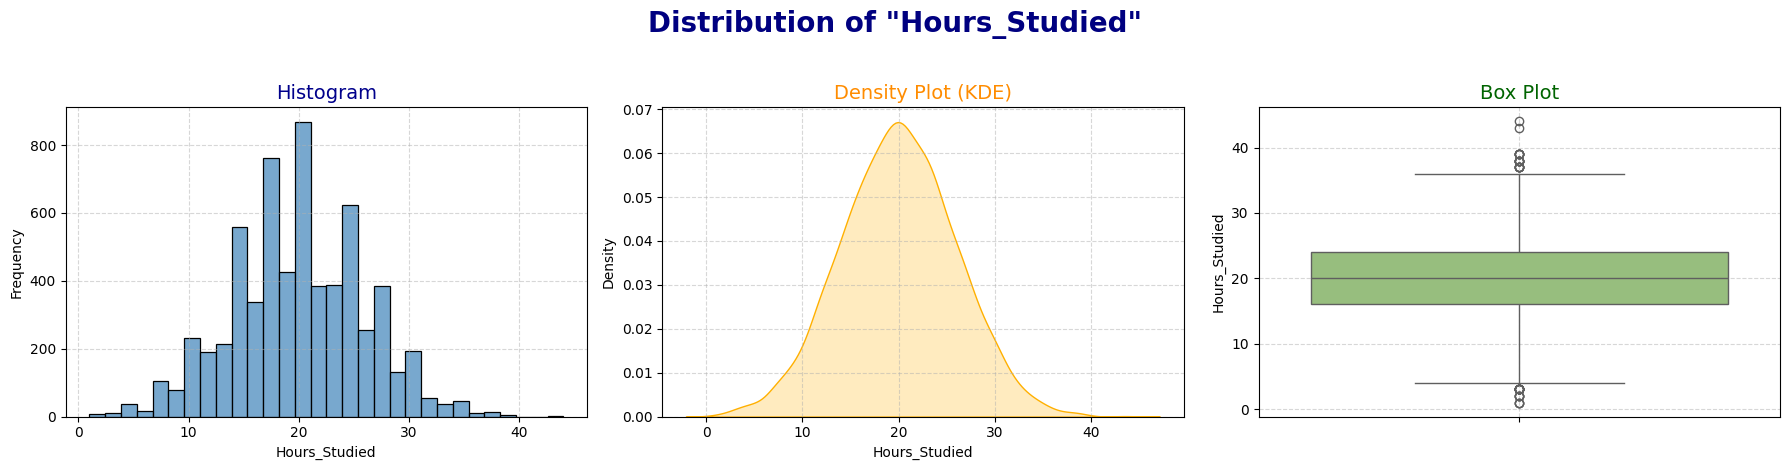

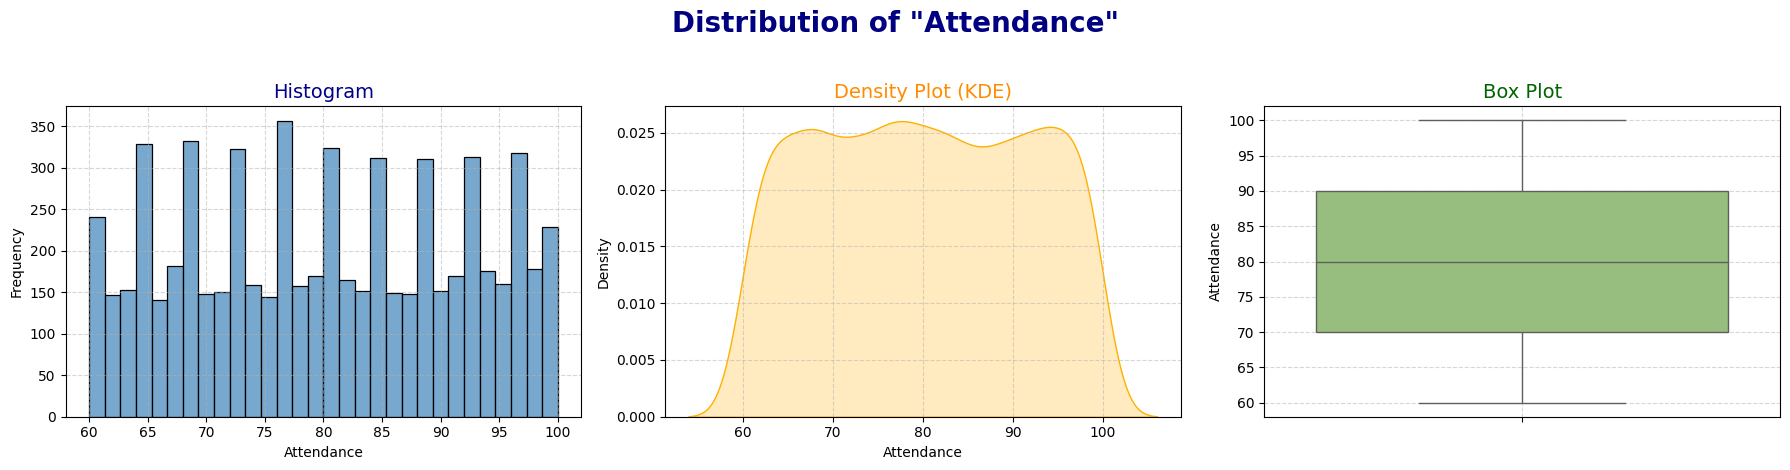

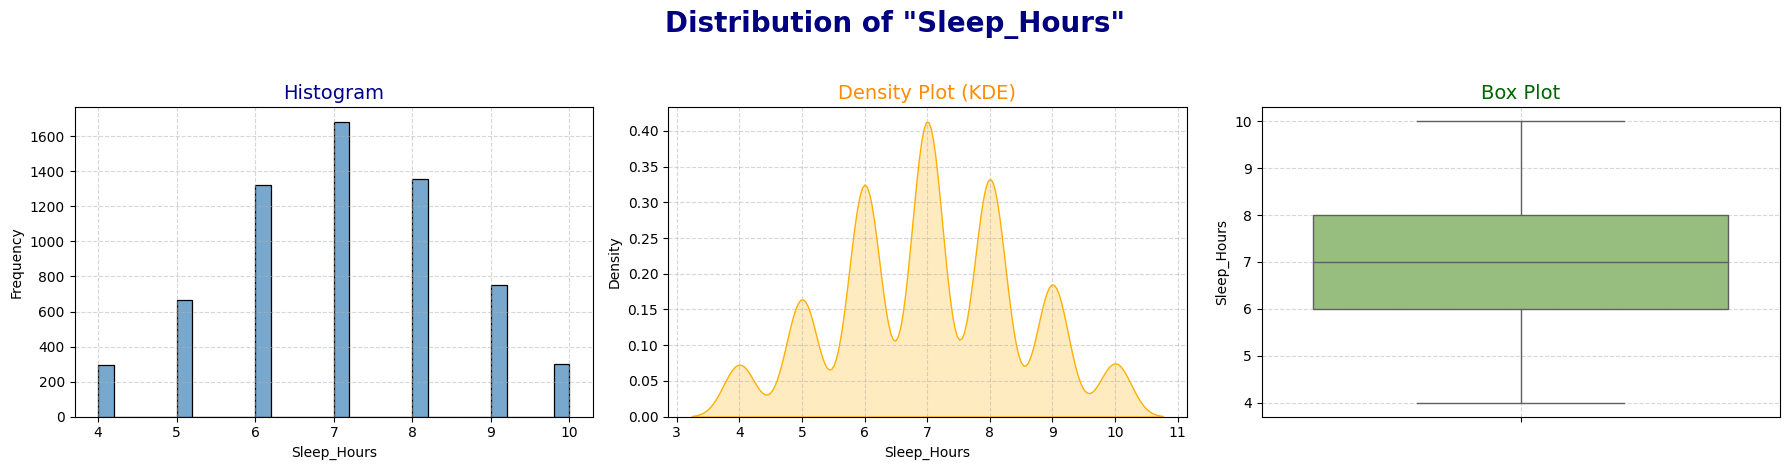

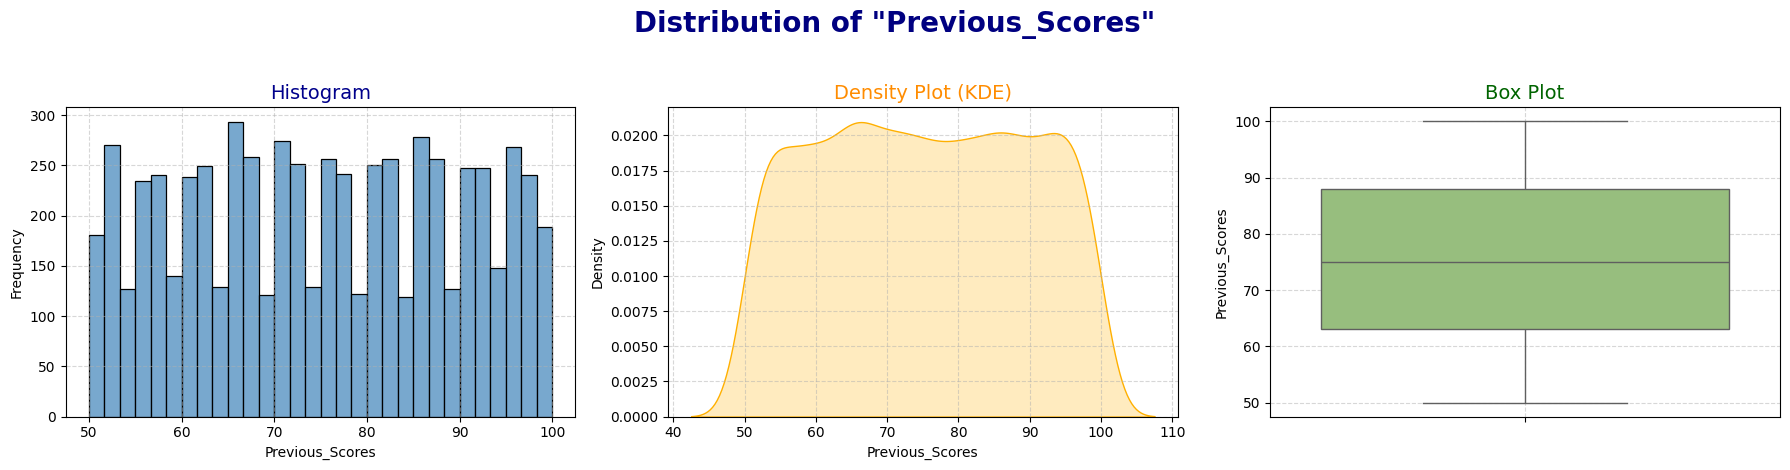

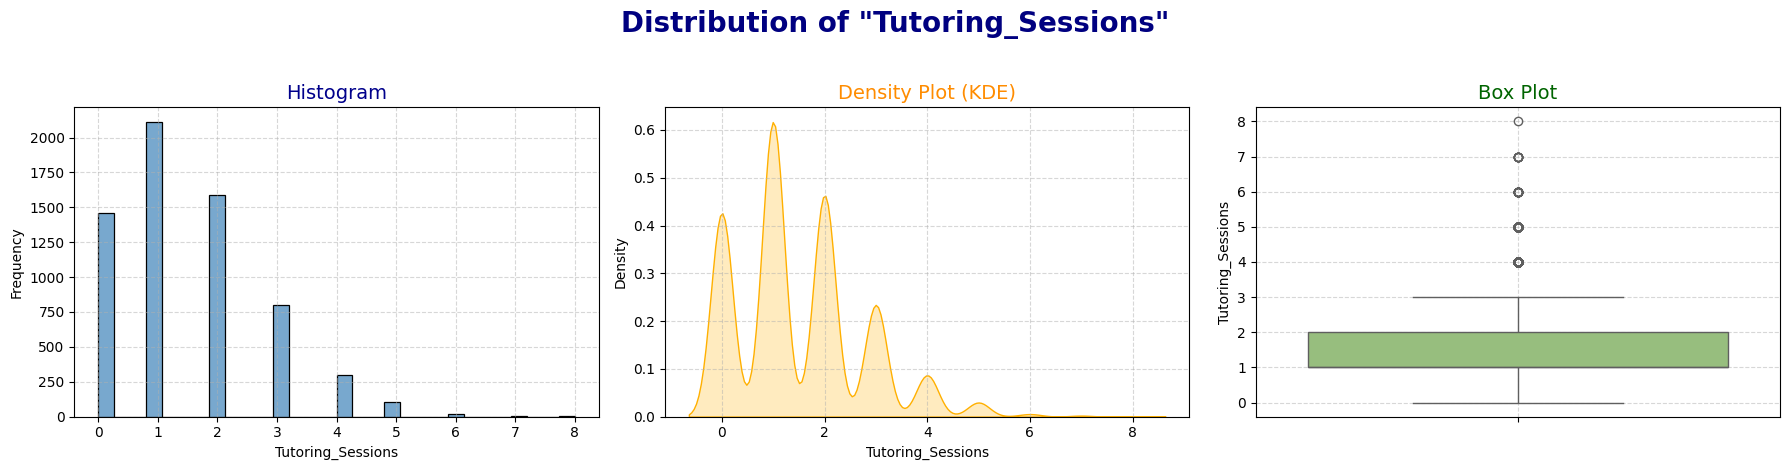

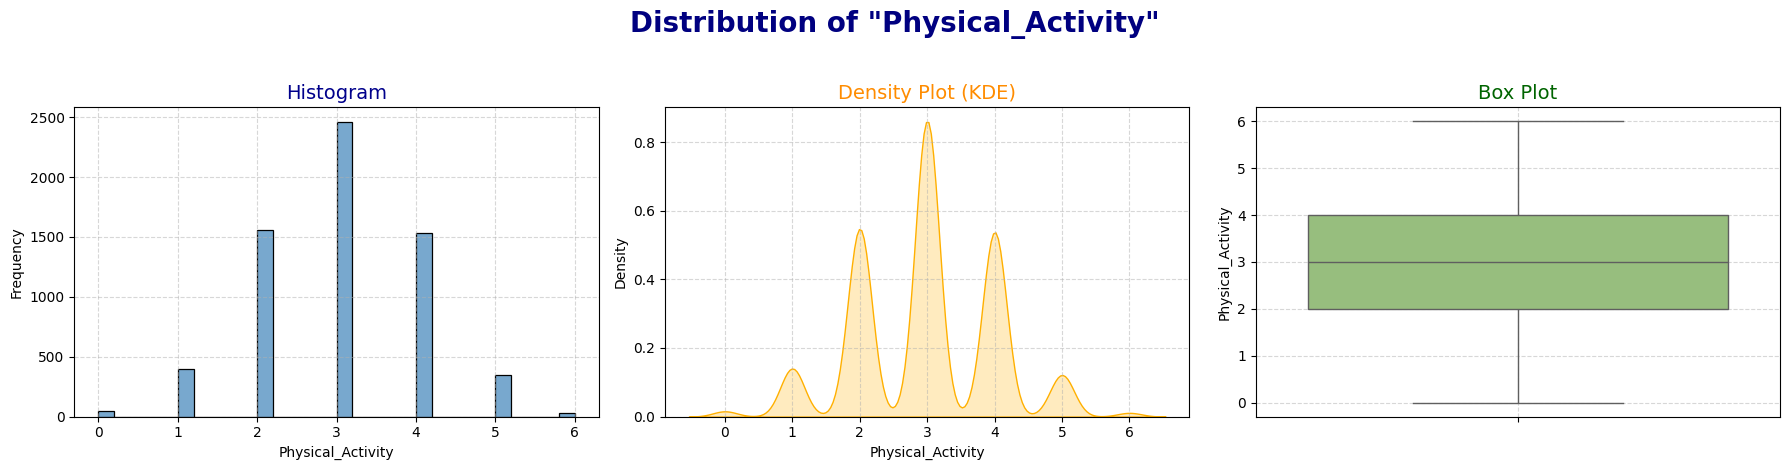

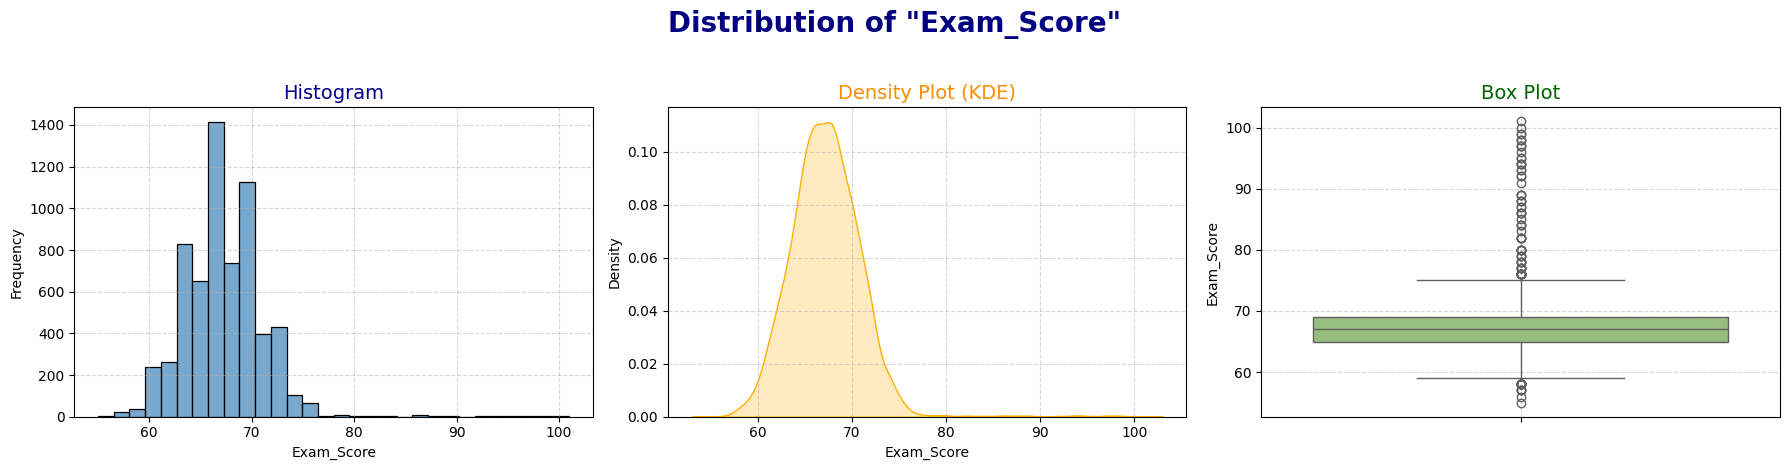

In [15]:
for col in num:
    plot_distribution(col, df)


In [16]:


def plot_categorical_distribution(column_name, df):


    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    data = df[column_name].dropna()
    counts = data.value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle(f'Distribution of "{column_name}"', fontsize=18, fontweight='bold')


    palette = sns.color_palette('Set2', len(counts))

    # Count Plot
    sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)
    axes[0].set_title('Count Plot', fontsize=14)
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Count')
    if counts.size > 5:
        axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette
    )
    axes[1].set_title('Pie Chart', fontsize=14)
    axes[1].axis('equal')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()



C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


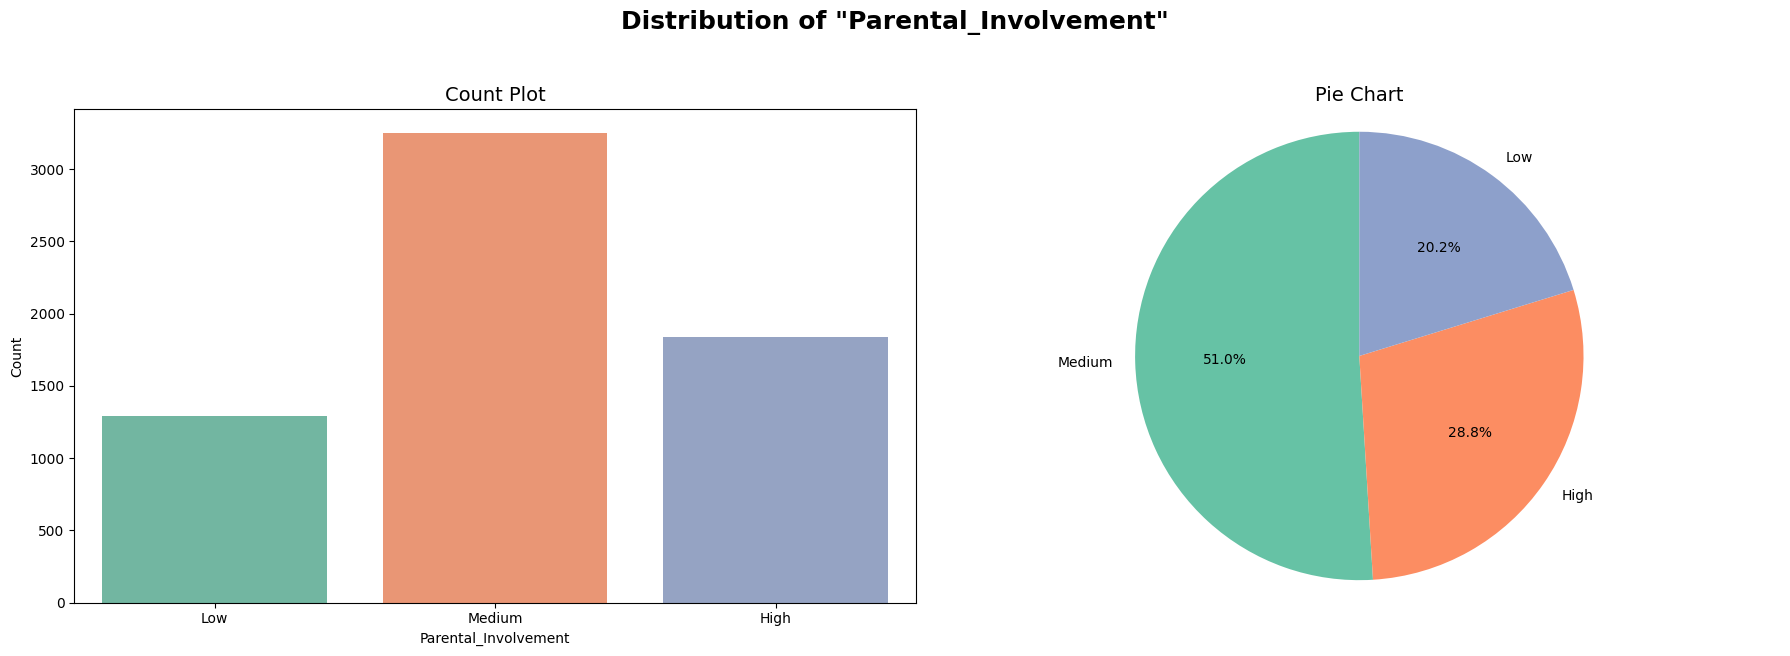

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


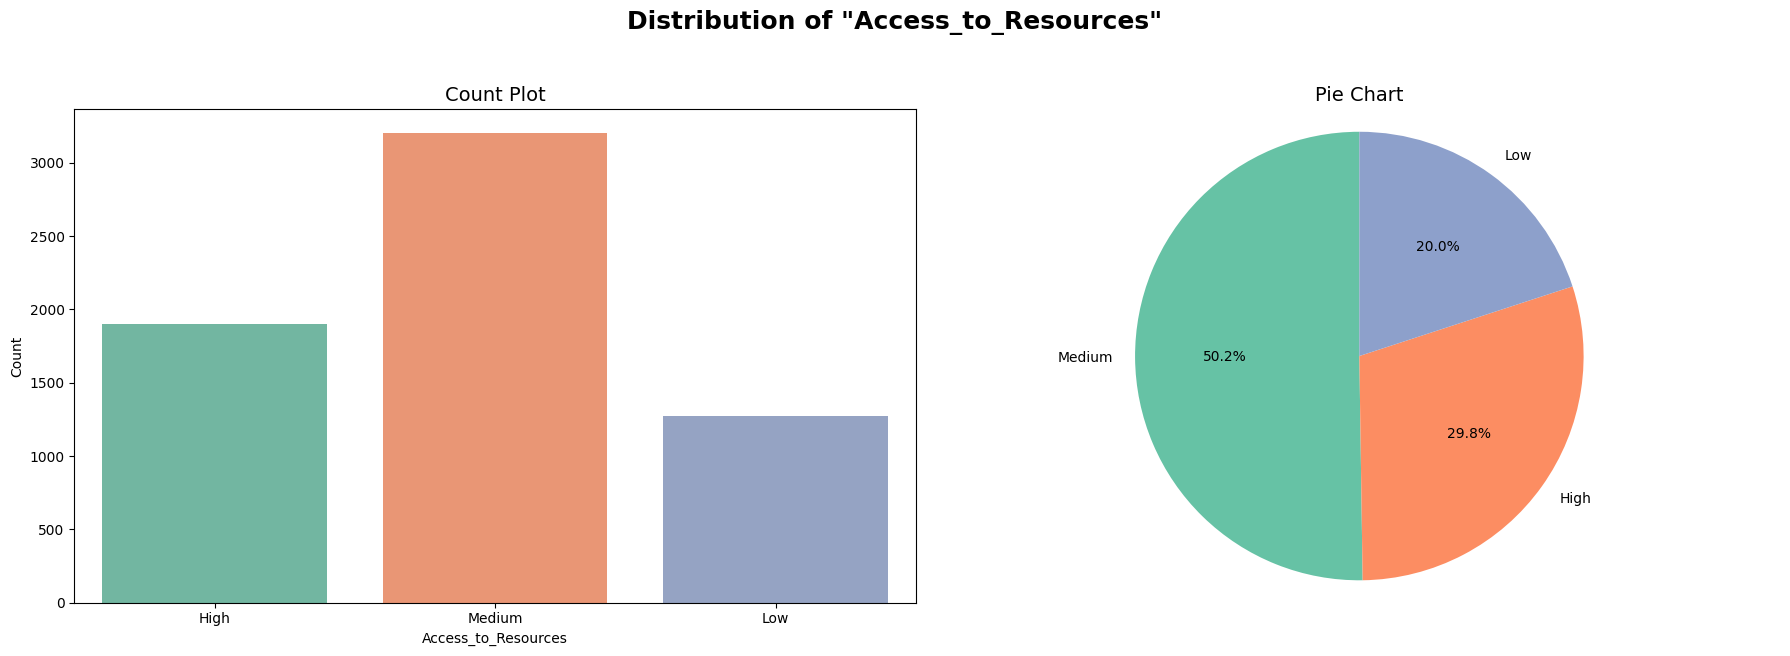

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


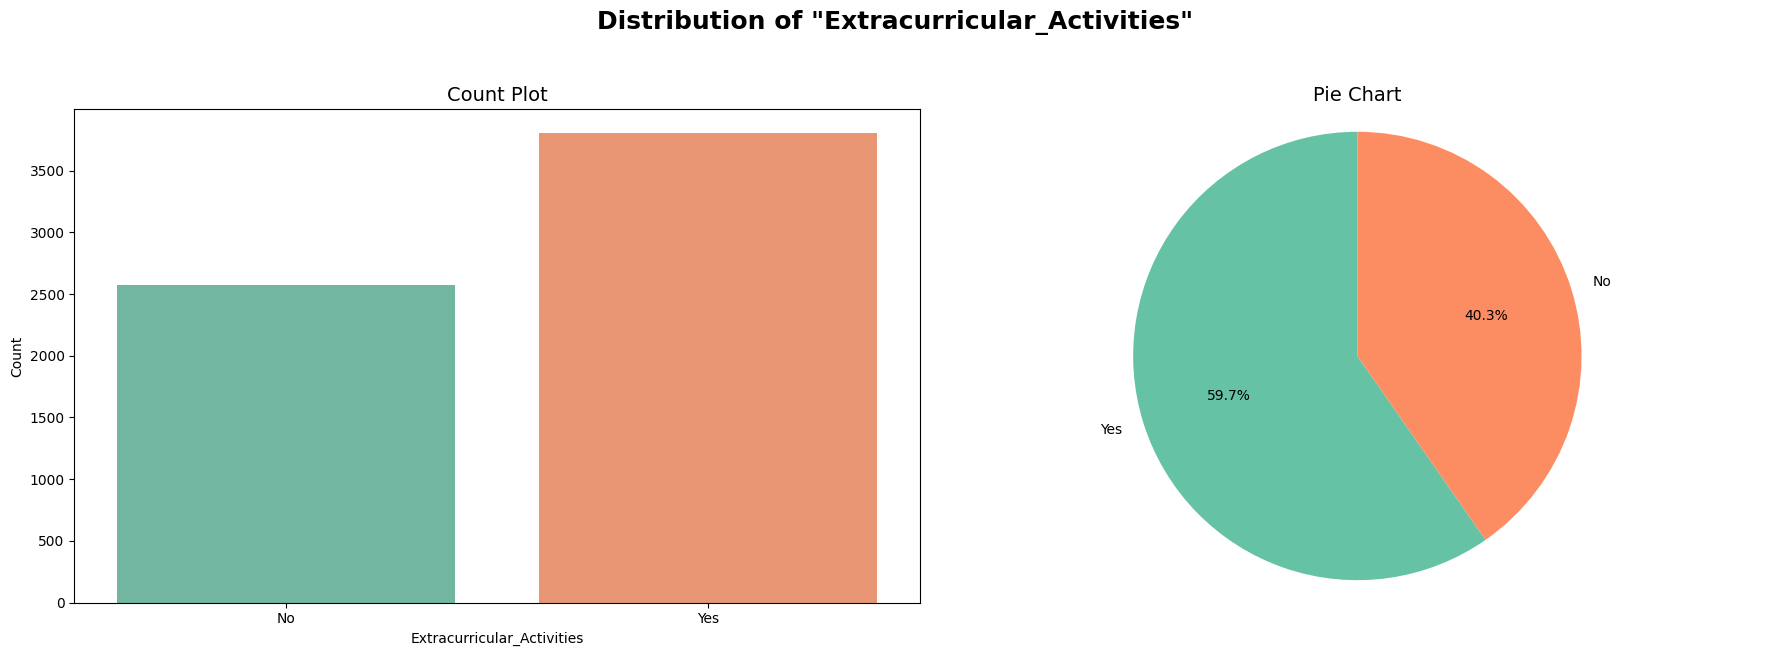

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


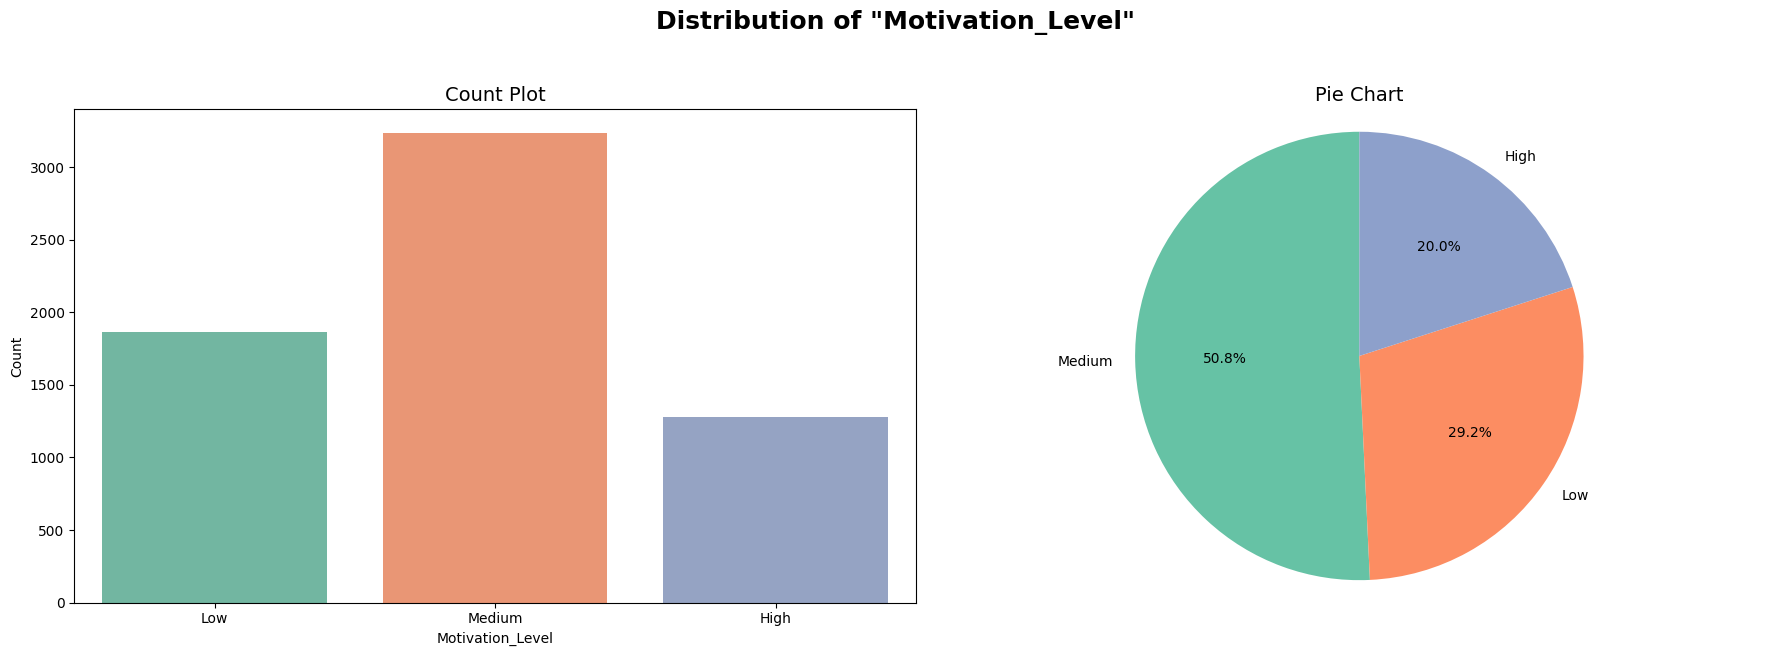

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


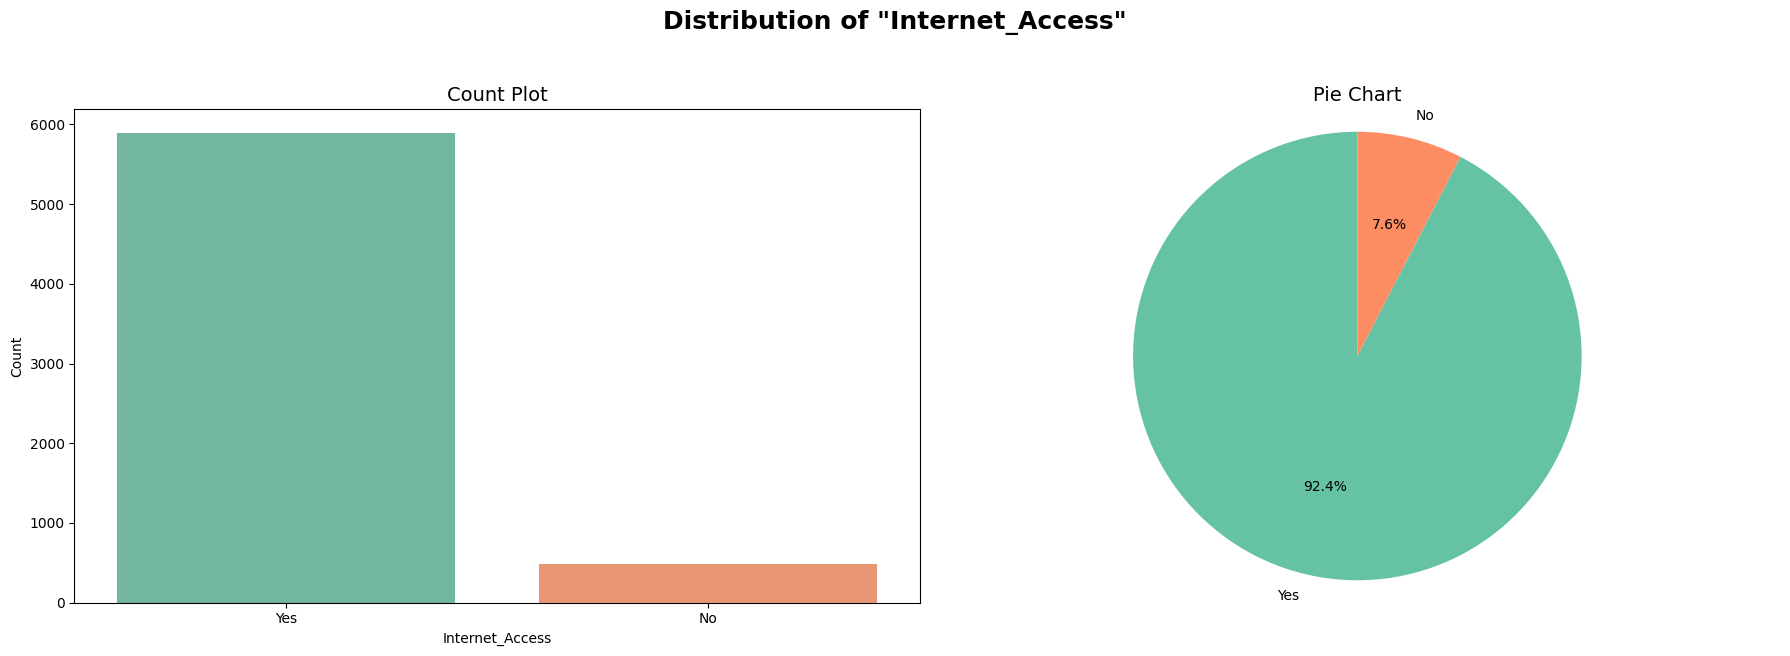

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


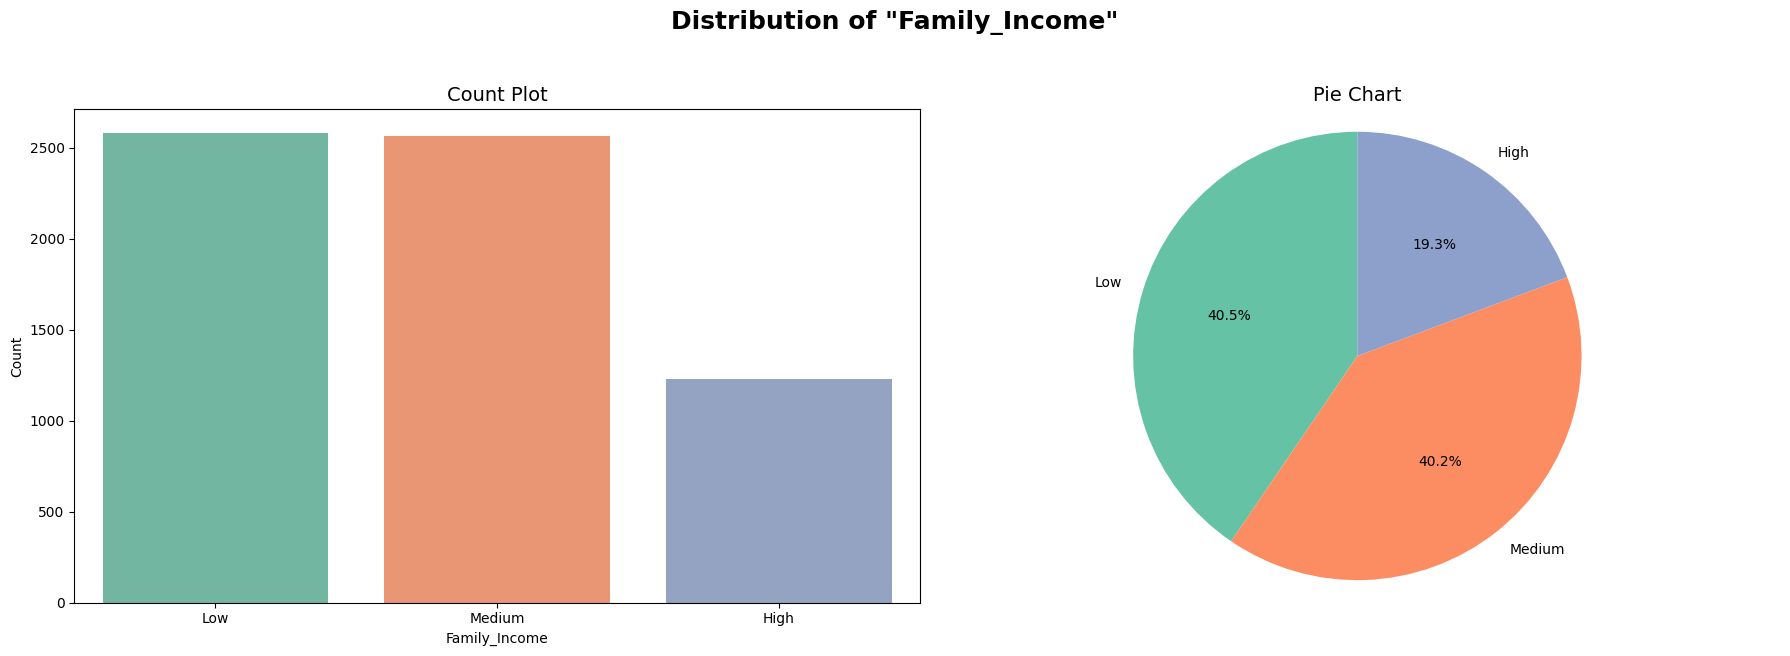

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


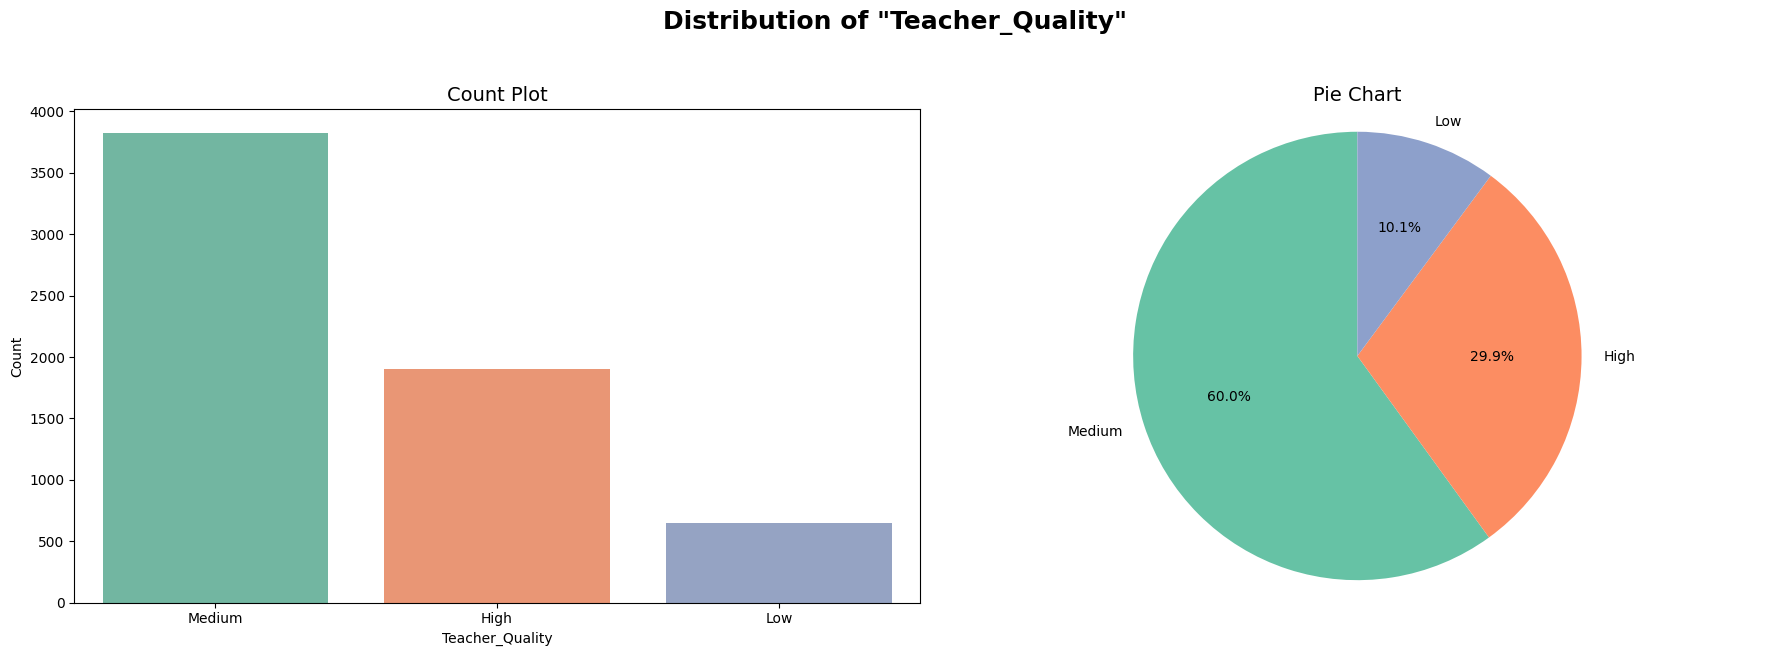

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


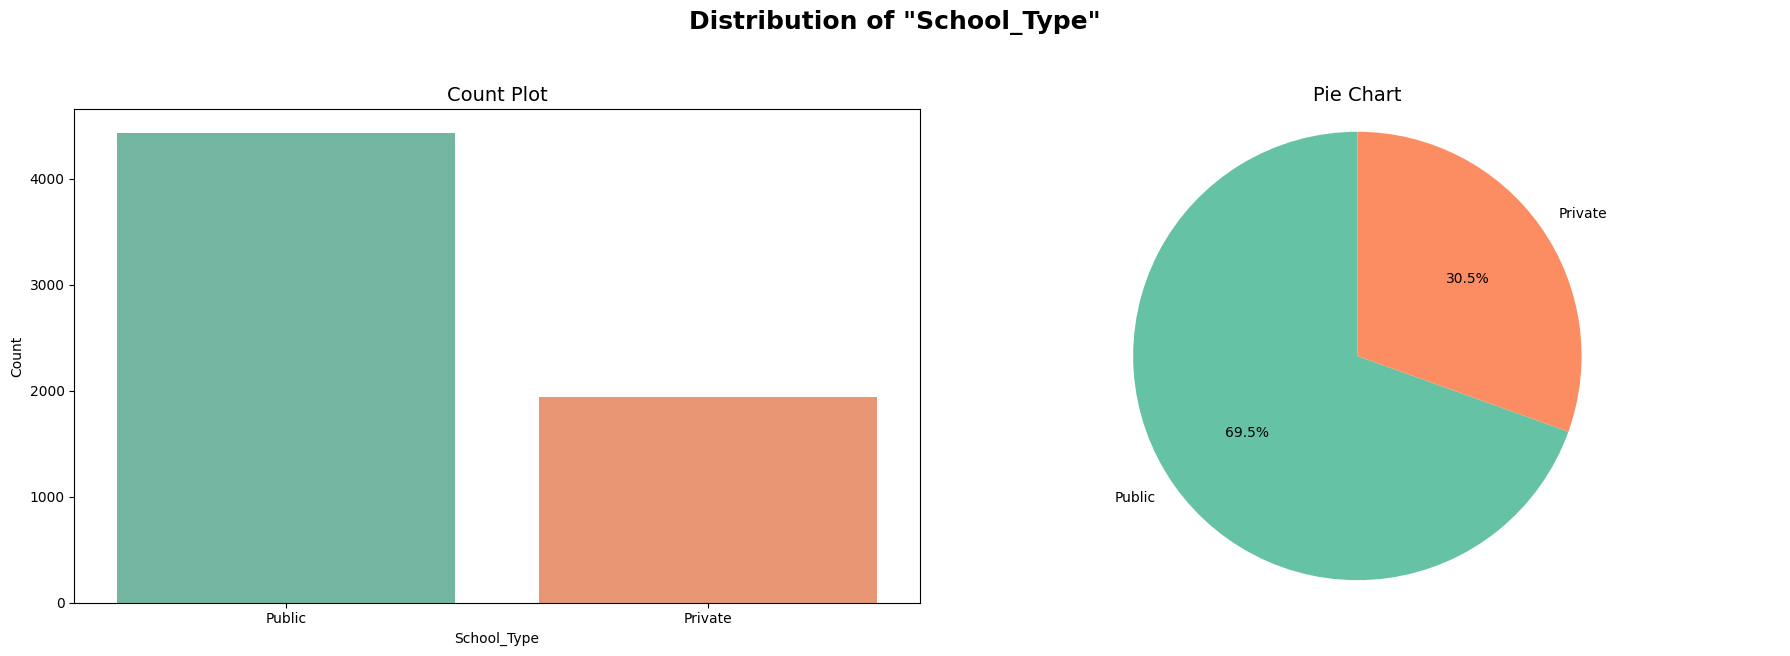

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


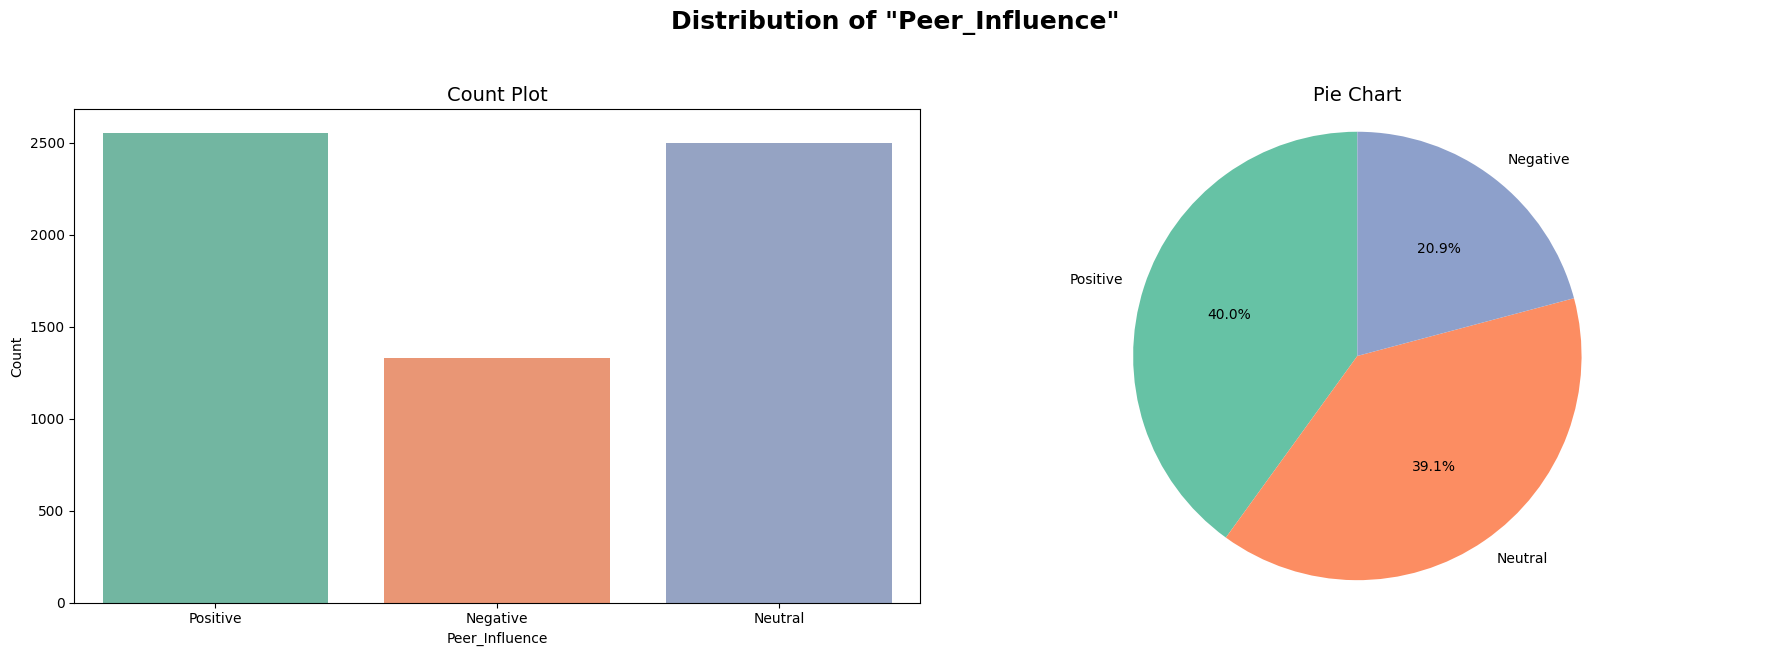

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


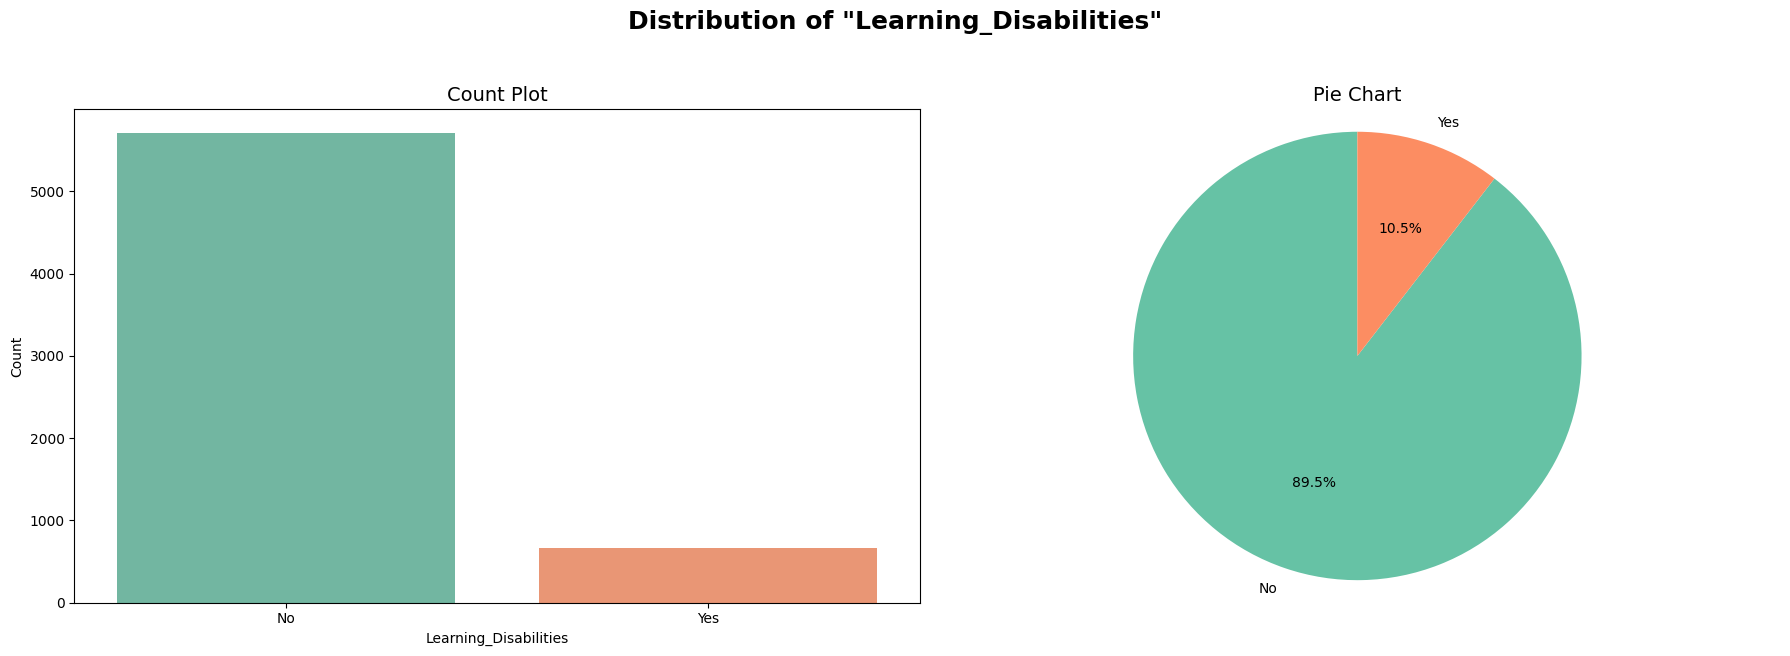

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


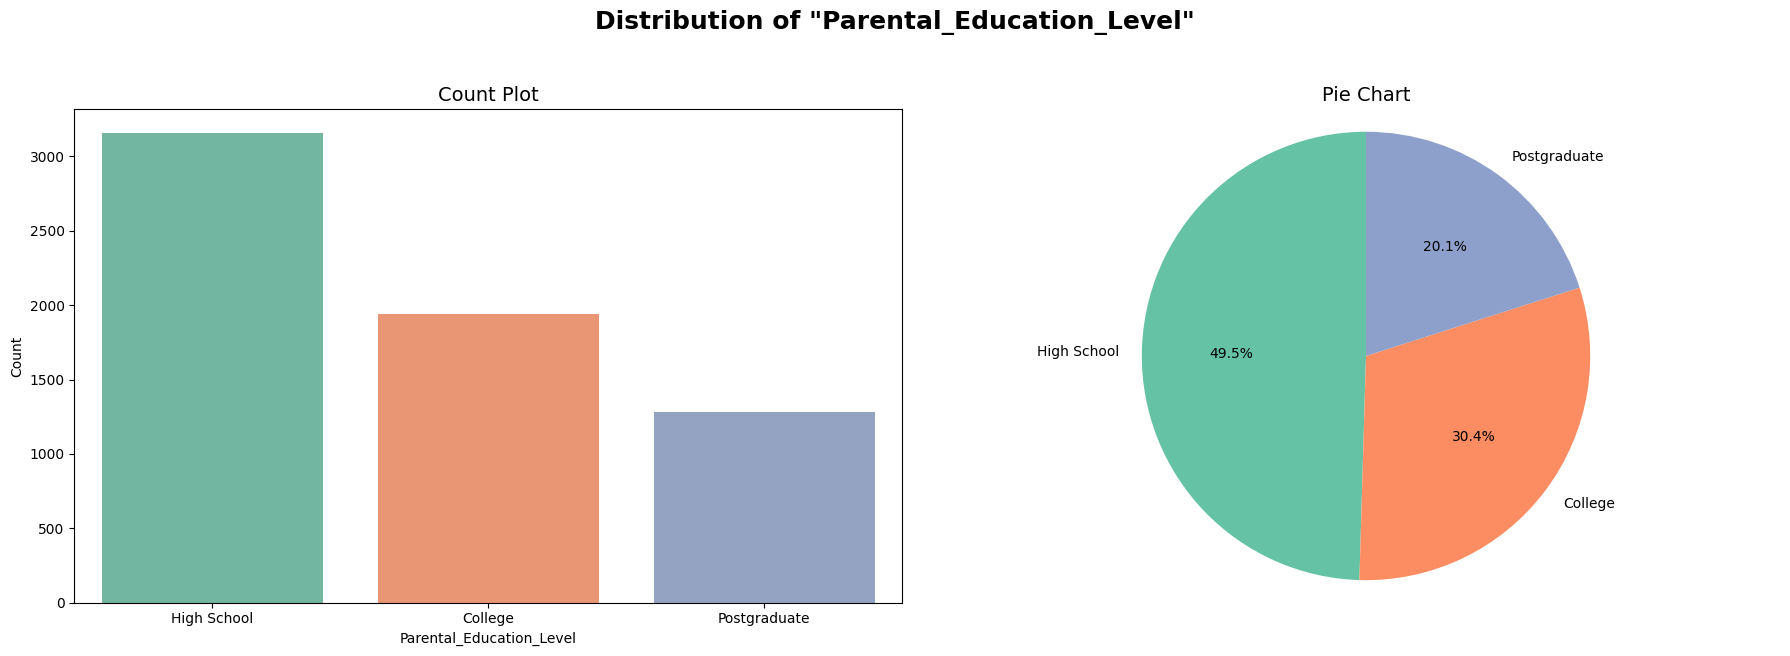

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


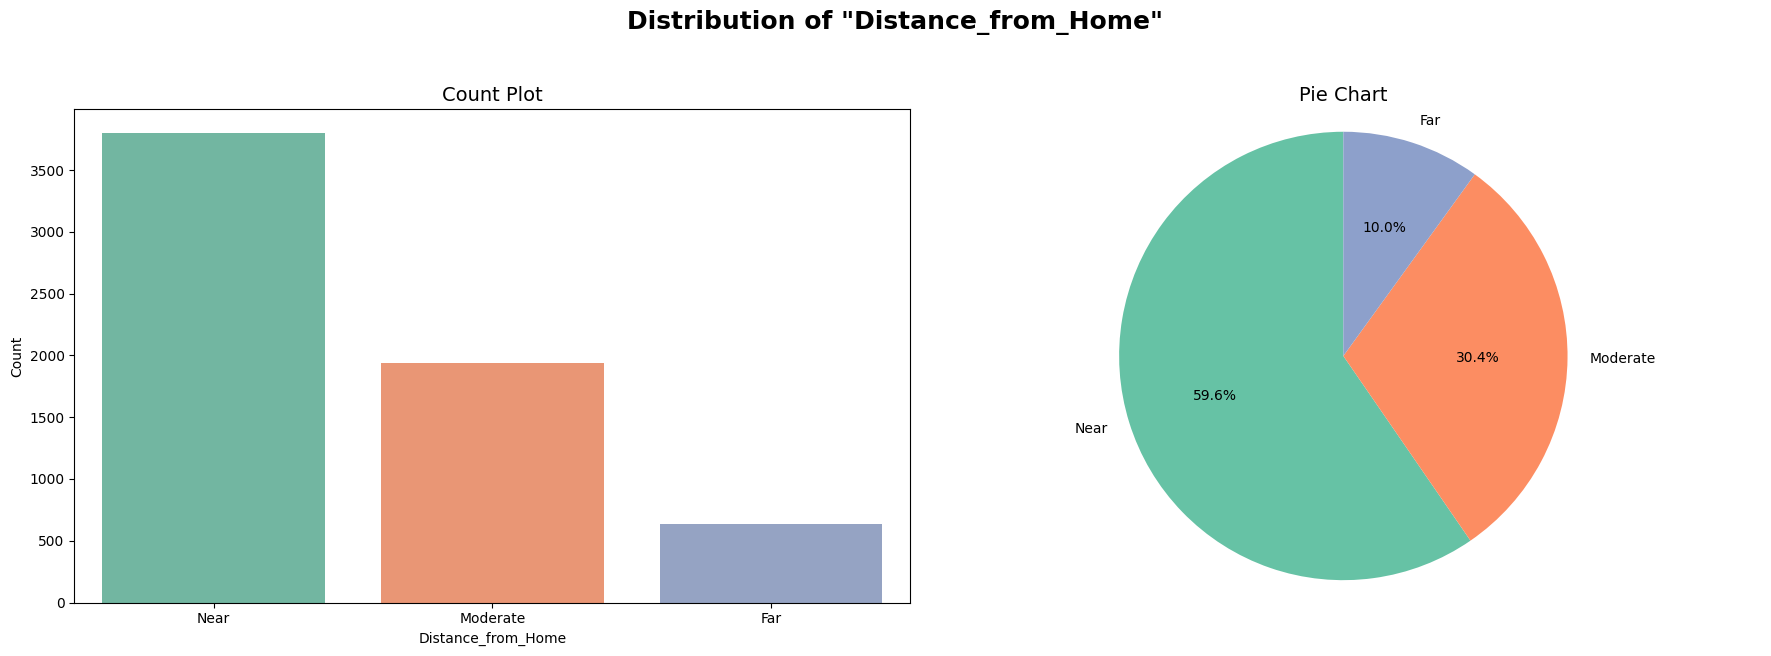

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_16620\2418740608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, ax=axes[0], palette=palette)


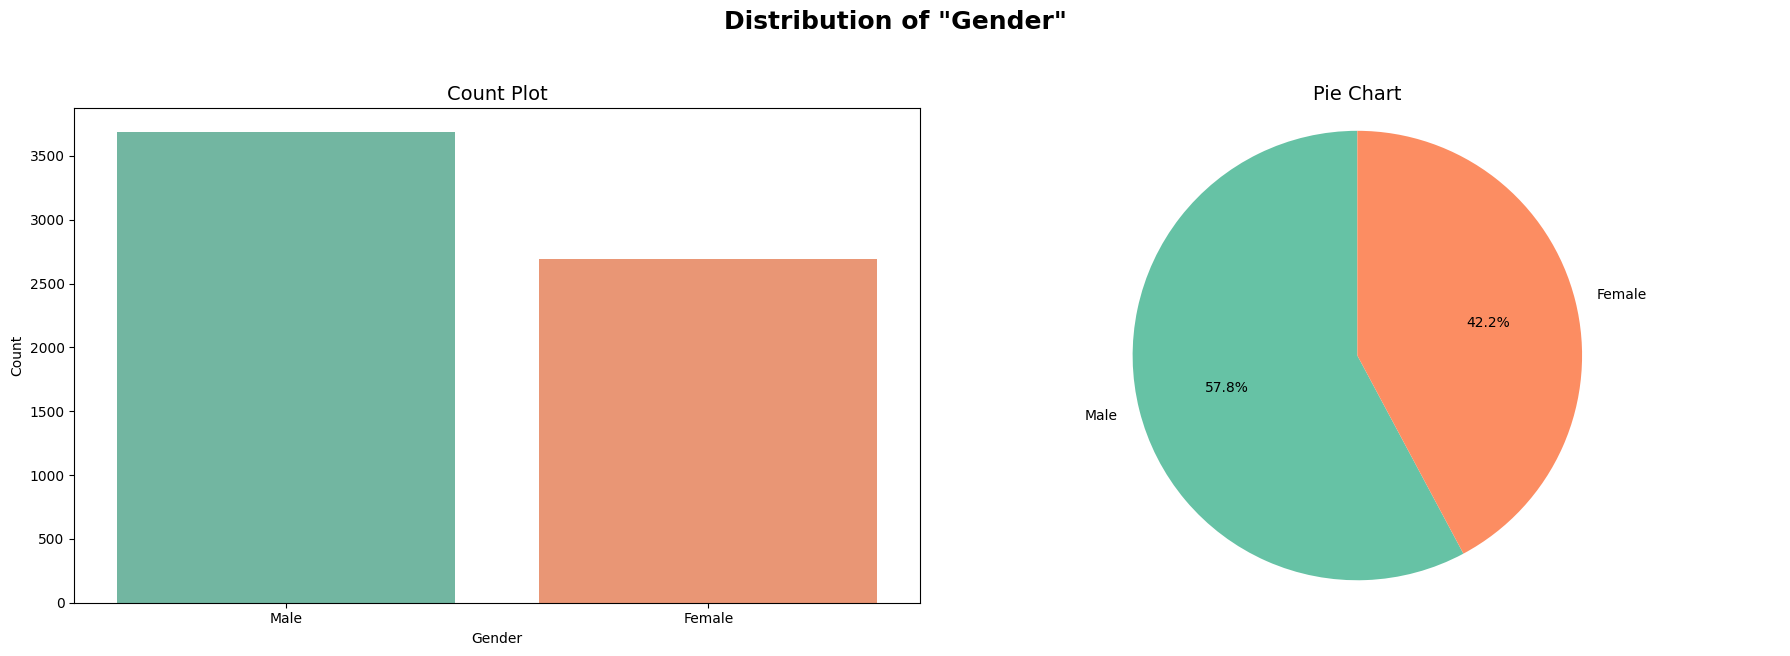

In [17]:
for col in cat:
    plot_categorical_distribution(col, df)

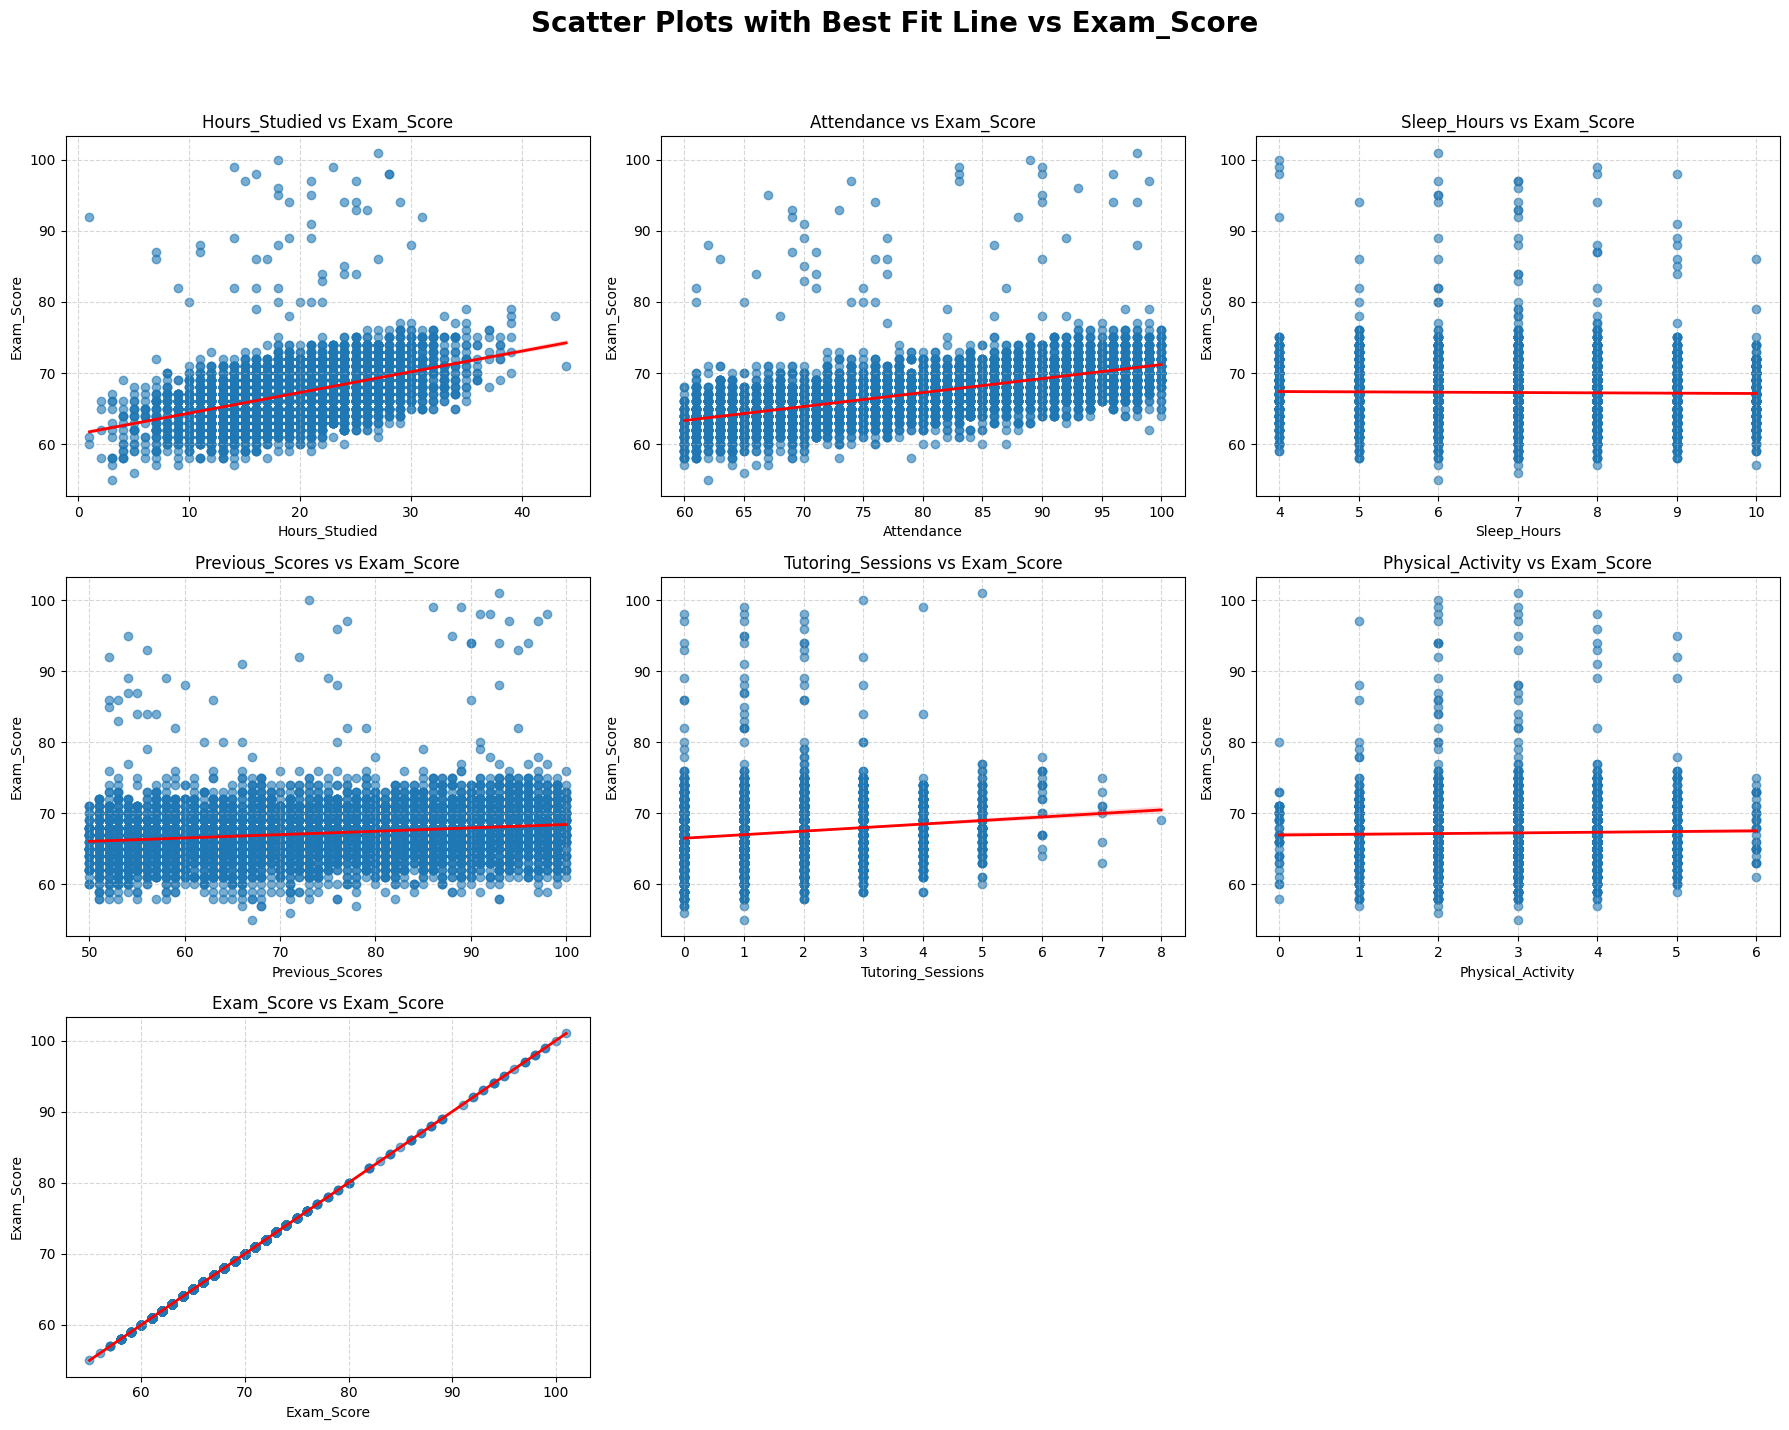

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) 
fig.suptitle('Scatter Plots with Best Fit Line vs Exam_Score', fontsize=20, fontweight='bold')
axes = axes.flatten() 

for i, feature in enumerate(num):
    if i < len(axes): 
        ax = axes[i]

        sns.regplot(
            x=feature,
            y='Exam_Score',
            data=df,
            ax=ax,
            scatter_kws={'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2}
        )
        ax.set_title(f'{feature} vs Exam_Score', fontsize=12)
        ax.set_xlabel(feature)
        ax.set_ylabel('Exam_Score')
        ax.grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

<Axes: >

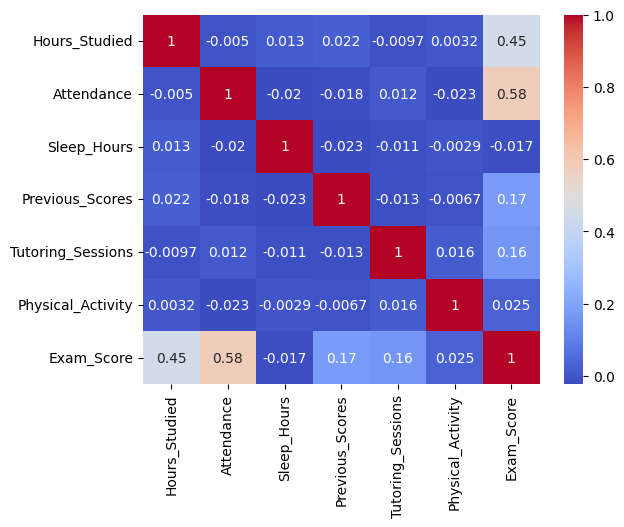

In [20]:
sns.heatmap(df[num].corr(),annot=True,cmap='coolwarm')


In [21]:
df.drop(columns=['Physical_Activity','Sleep_Hours'],inplace=True)

In [22]:
num=df.select_dtypes(exclude='object').columns

In [23]:
num

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Exam_Score'],
      dtype='object')

In [24]:
df[num].skew()

Hours_Studied        0.016225
Attendance           0.005663
Previous_Scores     -0.001362
Tutoring_Sessions    0.825261
Exam_Score           1.665831
dtype: float64

In [25]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR

    lowOutlier = df[df[col] < LO_FENNCE][col].values
    upOutlier = df[df[col] > UP_FENNCE][col].values

    df[col] = df[col].replace(lowOutlier, LO_FENNCE)
    df[col] = df[col].replace(upOutlier, UP_FENNCE)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Previous_Scores             6378 non-null   int64 
 6   Motivation_Level            6378 non-null   object
 7   Internet_Access             6378 non-null   object
 8   Tutoring_Sessions           6378 non-null   int64 
 9   Family_Income               6378 non-null   object
 10  Teacher_Quality             6378 non-null   object
 11  School_Type                 6378 non-null   object
 12  Peer_Influence              6378 non-null   object
 13  Learning_Disabilities       6378 non-null   object
 1

In [27]:
num

Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Exam_Score'],
      dtype='object')

In [28]:
for col in num:
    remove_outliers_iqr(df, col)

In [29]:
df.shape

(6378, 18)

In [30]:
ordinal_maps = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)

In [31]:
nominal_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type',
    'Gender'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hours_Studied                   6378 non-null   int64  
 1   Attendance                      6378 non-null   int64  
 2   Parental_Involvement            6378 non-null   int64  
 3   Access_to_Resources             6378 non-null   int64  
 4   Previous_Scores                 6378 non-null   int64  
 5   Motivation_Level                6378 non-null   int64  
 6   Tutoring_Sessions               6378 non-null   float64
 7   Family_Income                   6378 non-null   int64  
 8   Teacher_Quality                 6378 non-null   int64  
 9   Peer_Influence                  6378 non-null   int64  
 10  Parental_Education_Level        6378 non-null   int64  
 11  Distance_from_Home              6378 non-null   int64  
 12  Exam_Score                      6378 no

In [33]:
X=df.drop(columns=['Exam_Score'])
y=df['Exam_Score']

In [34]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
ir=LinearRegression()
ir.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=ir.predict(X_test)

In [37]:
ir.score(X_test,y_test)

0.9246969148097581

In [38]:
ir.score(X_train,y_train)

0.9291005742262494

In [39]:
r2_score(y_test,y_pred)

0.9246969148097581

In [40]:
mean_squared_error(y_test,y_pred)

0.8559484314096801

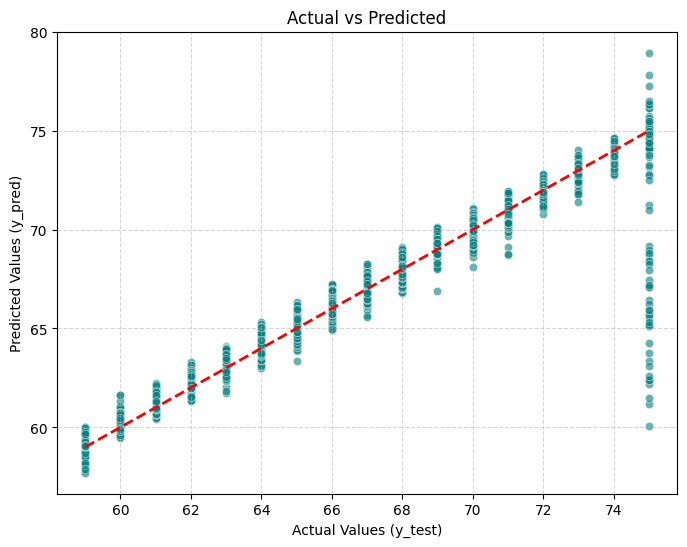

In [ ]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

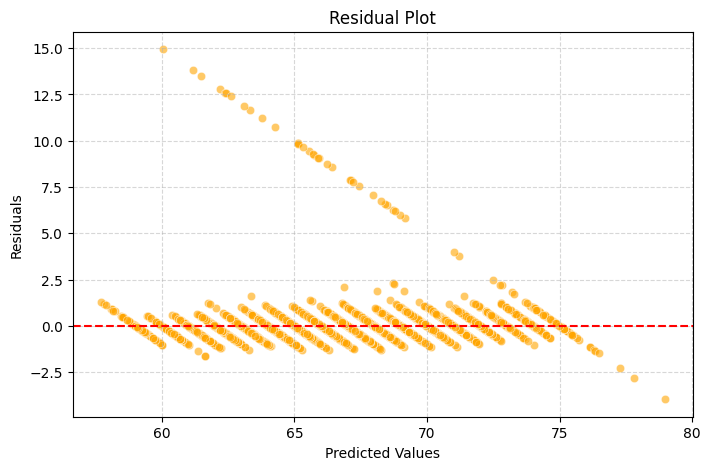

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

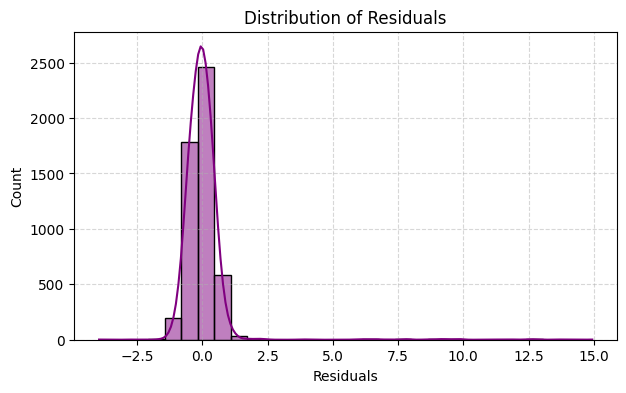

In [43]:
plt.figure(figsize=(7, 4))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [44]:
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")

Polynomial Regression (degree=2) - MSE: 1.0337, R2: 0.9091


In [45]:
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print(f"Polynomial Regression (degree={degree}) - MSE: {mean_squared_error(y_test, y_pred_poly):.4f}, R2: {r2_score(y_test, y_pred_poly):.4f}")

Polynomial Regression (degree=3) - MSE: 7.9355, R2: 0.3019


In [49]:
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)


Linear Regression - MSE: 0.8559, R2: 0.9247
Polynomial Regression (degree=2) - MSE: 1.0337, R2: 0.9091
Polynomial Regression (degree=3) - MSE: 7.9355, R2: 0.3019


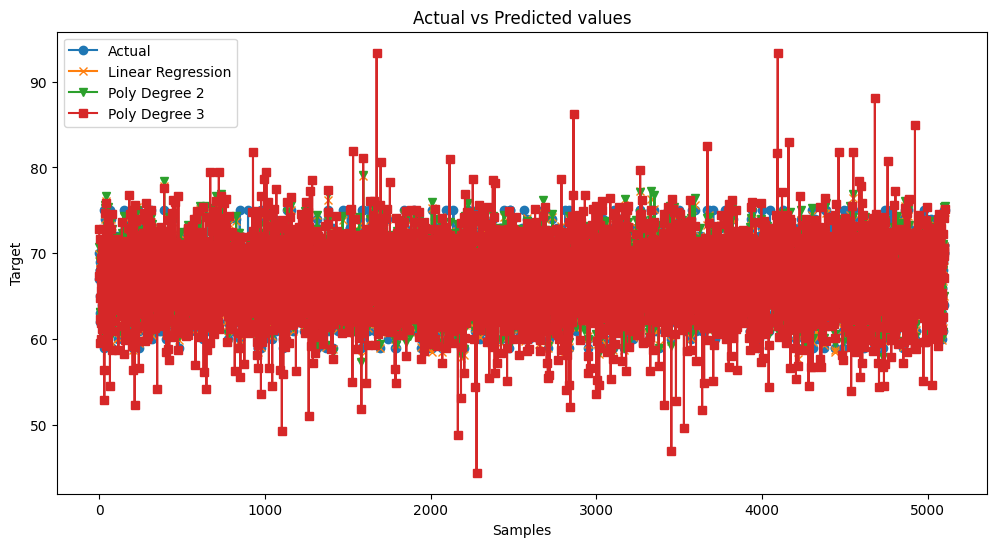

In [51]:
degree2 = 2
poly2 = make_pipeline(PolynomialFeatures(degree2), LinearRegression())
poly2.fit(X_train, y_train)
y_pred_poly2 = poly2.predict(X_test)
mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

degree3 = 3
poly3 = make_pipeline(PolynomialFeatures(degree3), LinearRegression())
poly3.fit(X_train, y_train)
y_pred_poly3 = poly3.predict(X_test)
mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

print(f"Linear Regression - MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}")
print(f"Polynomial Regression (degree={degree2}) - MSE: {mse_poly2:.4f}, R2: {r2_poly2:.4f}")
print(f"Polynomial Regression (degree={degree3}) - MSE: {mse_poly3:.4f}, R2: {r2_poly3:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Linear Regression', marker='x')
plt.plot(y_pred_poly2, label=f'Poly Degree {degree2}', marker='v')
plt.plot(y_pred_poly3, label=f'Poly Degree {degree3}', marker='s')
plt.legend()
plt.title('Actual vs Predicted values')
plt.xlabel('Samples')
plt.ylabel('Target')
plt.show()